### Classification for melanoma dataset

#### Read input data :

In [28]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data('Melanoma', show_doc=True)

Melanoma

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Survival from Malignant Melanoma

### Description

The `Melanoma` data frame has data on 205 patients in Denmark with malignant
melanoma.

### Usage

    Melanoma

### Format

This data frame contains the following columns:

`time`

survival time in days, possibly censored.

`status`

`1` died from melanoma, `2` alive, `3` dead from other causes.

`sex`

`1` = male, `0` = female.

`age`

age in years.

`year`

of operation.

`thickness`

tumour thickness in mm.

`ulcer`

`1` = presence, `0` = absence.

### Source

P. K. Andersen, O. Borgan, R. D. Gill and N. Keiding (1993) _Statistical
Models based on Counting Processes._ Springer.




In [29]:
mel_data = data('Melanoma')

Remove samples where death of patient is not related to Melanoma (status = 3)

In [30]:
mel_data = mel_data[mel_data.status != 3]

#### Plot the patients status vs age and status vs thickness

status = 1 -> Died from Melanoma

status = 2 -> Alive

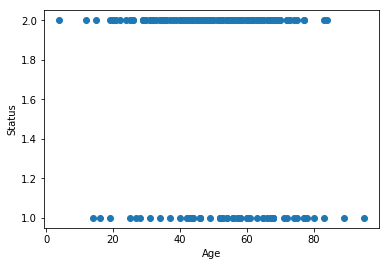

Correlation between patient age and status -0.1400 


In [33]:
plt.plot(mel_data.age, mel_data.status, 'o')
plt.xlabel("Age")
plt.ylabel("Status")
plt.show()

print("Correlation between patient age and status %0.4f "\
      % np.corrcoef(np.array([mel_data.age, mel_data.status]))[0,1])

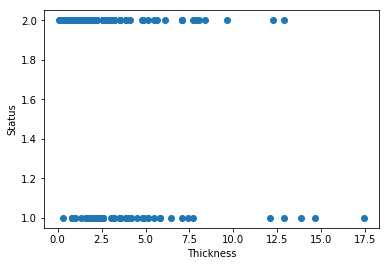

Correlation between melonama thickness and status -0.3261 


In [34]:
plt.plot(mel_data.thickness, mel_data.status, 'o')
plt.xlabel("Thickness")
plt.ylabel("Status")
plt.show()

print("Correlation between melonama thickness and status %0.4f "\
      % np.corrcoef(np.array([mel_data.thickness, mel_data.status]))[0,1])

#### Split the dataset into train and test sets:

In [9]:
mel_statuses = mel_data.status
mel_samples = mel_data.drop(columns=['status'])
(mel_train_samples, mel_test_samples, mel_train_statuses, mel_test_statuses) = \
train_test_split(mel_samples, mel_statuses, test_size=0.3, stratify=mel_statuses, random_state=0)

#### Classify using Random Forest classifier:

In [10]:
clf = RandomForestClassifier(random_state=0) # Take default parameter values
clf.fit(mel_train_samples, mel_train_statuses)
mel_predict_statuses = clf.predict(mel_test_samples)
print("Accuracy Score %0.4f" % accuracy_score(mel_test_statuses, mel_predict_statuses))

Accuracy Score 0.9310


#### Classify using SVC:

In [35]:
from sklearn.svm import SVC
clf = SVC(random_state=0) # Take default parameter values
clf.fit(mel_train_samples, mel_train_statuses)
mel_predict_statuses = clf.predict(mel_test_samples)
print("Accuracy Score %0.4f" % accuracy_score(mel_test_statuses, mel_predict_statuses))

Accuracy Score 0.7069


In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_scores = []
precision_scores = []
recall_scores = []
for i in range(5):
    clf = RandomForestClassifier(random_state=i) # Take default parameter values
    clf.fit(mel_train_samples, mel_train_statuses)
    mel_predict_statuses = clf.predict(mel_test_samples)
    accuracy_scores.append(accuracy_score(mel_test_statuses, mel_predict_statuses)) # (tp + tn) / (tp+fp+tn+fn)
    precision_scores.append(precision_score(mel_test_statuses, mel_predict_statuses)) # tp / (tp + fp)
    recall_scores.append(recall_score(mel_test_statuses, mel_predict_statuses)) #  tp / (tp + fn)


In [39]:
print("Mean of Accuracy, Precision, Recall Scores %0.4f, %0.4f, %0.4f" %  \
      (np.mean(accuracy_scores),np.mean(precision_scores),np.mean(recall_scores)))
print("Standard Deviation of Accuracy, Precision, Recall Scores %0.6f, %0.6f, %0.6f" %  \
      (np.std(accuracy_scores),np.std(precision_scores),np.std(recall_scores)))

Mean of Accuracy, Precision, Recall Scores 0.9103, 0.9039, 0.7765
Standard Deviation of Accuracy, Precision, Recall Scores 0.027586, 0.032186, 0.086453
